### Exercises
The dataset for these exercises lives in the Codeup Data Science MySQL Server. The database name is curriculum_logs.

Go through the lesson commenting code, adding docstrings, and adding markdown to support what is happening.

In [53]:
#standard imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import env

import warnings
warnings.filterwarnings("ignore")

In [54]:
#set up url using credentials in env file
url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/curriculum_logs'

#sql querry to ping the serve    
query = '''
SELECT date,
       path as endpoint,
       user_id,
       cohort_id,
       ip as source_ip
FROM logs;
'''
#assign the query to dataframe
df0 = pd.read_sql(query, url)

In [55]:
# make a copy of dataframe so changes made in that dataframe will not affect the original dataframe
df = df0.copy()

In [56]:
#peek the head
df.head()

,date,endpoint,user_id,cohort_id,source_ip
0,2018-01-26,/,1,8.0,97.105.19.61
1,2018-01-26,java-ii,1,8.0,97.105.19.61
2,2018-01-26,java-ii/object-oriented-programming,1,8.0,97.105.19.61
3,2018-01-26,slides/object_oriented_programming,1,8.0,97.105.19.61
4,2018-01-26,javascript-i/conditionals,2,22.0,97.105.19.61


In [57]:
#get info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900223 entries, 0 to 900222
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   date       900223 non-null  object 
 1   endpoint   900222 non-null  object 
 2   user_id    900223 non-null  int64  
 3   cohort_id  847330 non-null  float64
 4   source_ip  900223 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 34.3+ MB


### Prepare

In [58]:
#turn date into datetime
df.date = df.date.astype("datetime64")
#set date into index
df = df.set_index("date").sort_index()

In [59]:
#now check the head
df

,endpoint,user_id,cohort_id,source_ip
date,,,,
2018-01-26,/,1,8.0,97.105.19.61
2018-01-26,java-ii,1,8.0,97.105.19.61
2018-01-26,java-ii/object-oriented-programming,1,8.0,97.105.19.61
2018-01-26,slides/object_oriented_programming,1,8.0,97.105.19.61
2018-01-26,javascript-i/conditionals,2,22.0,97.105.19.61
...,...,...,...,...
2021-04-21,jquery/personal-site,64,28.0,71.150.217.33
2021-04-21,jquery/mapbox-api,64,28.0,71.150.217.33
2021-04-21,jquery/ajax/weather-map,64,28.0,71.150.217.33


In [60]:
#lets see how many dates count we have
df.index.value_counts(sort = False)

2018-01-26     572
2018-01-27     230
2018-01-28     170
2018-01-29     830
2018-01-30     652
              ... 
2021-04-17     478
2021-04-18     659
2021-04-19    2156
2021-04-20    1930
2021-04-21    1131
Name: date, Length: 1182, dtype: int64

In [61]:
#how maany pages was hit in each day
pages = df.endpoint.resample("D").count()
pages.head()

date
2018-01-26    572
2018-01-27    230
2018-01-28    170
2018-01-29    830
2018-01-30    652
Freq: D, Name: endpoint, dtype: int64

#### Exponential Moving Average (ema) aka ewm() in python
ema puts more weight on more recent observations and helps reduce lag while the SMA weights all observations equally so 

In [62]:
# get 7 days ema
ema_7d = pages.ewm(span = 7).mean()
ema_7d

date
2018-01-26     572.000000
2018-01-27     376.571429
2018-01-28     287.243243
2018-01-29     485.737143
2018-01-30     540.235595
                 ...     
2021-04-17    1303.458794
2021-04-18    1142.344096
2021-04-19    1395.758072
2021-04-20    1529.318554
2021-04-21    1429.738915
Freq: D, Name: endpoint, Length: 1182, dtype: float64

In [63]:
#get 14days ema
ema_14d = pages.ewm(span = 14).mean()
ema_14d

date
2018-01-26     572.000000
2018-01-27     388.785714
2018-01-28     305.208829
2018-01-29     465.757252
2018-01-30     514.347700
                 ...     
2021-04-17    1348.173718
2021-04-18    1256.283889
2021-04-19    1376.246037
2021-04-20    1450.079899
2021-04-21    1407.535912
Freq: D, Name: endpoint, Length: 1182, dtype: float64

In [64]:
#get 30 days e,ma
ema_30d = pages.ewm(span = 30).mean()
ema_30d

date
2018-01-26     572.000000
2018-01-27     395.300000
2018-01-28     315.139578
2018-01-29     457.002386
2018-01-30     501.369064
                 ...     
2021-04-17    1325.179115
2021-04-18    1282.199817
2021-04-19    1338.574023
2021-04-20    1376.730537
2021-04-21    1360.876954
Freq: D, Name: endpoint, Length: 1182, dtype: float64

In [65]:
#get 90 days ema
ema_90d = pages.ewm(span = 90).mean()
ema_90d

date
2018-01-26     572.000000
2018-01-27     399.100000
2018-01-28     321.030081
2018-01-29     452.545042
2018-01-30     494.228442
                 ...     
2021-04-17    1192.041636
2021-04-18    1180.326435
2021-04-19    1201.769810
2021-04-20    1217.774869
2021-04-21    1215.867729
Freq: D, Name: endpoint, Length: 1182, dtype: float64

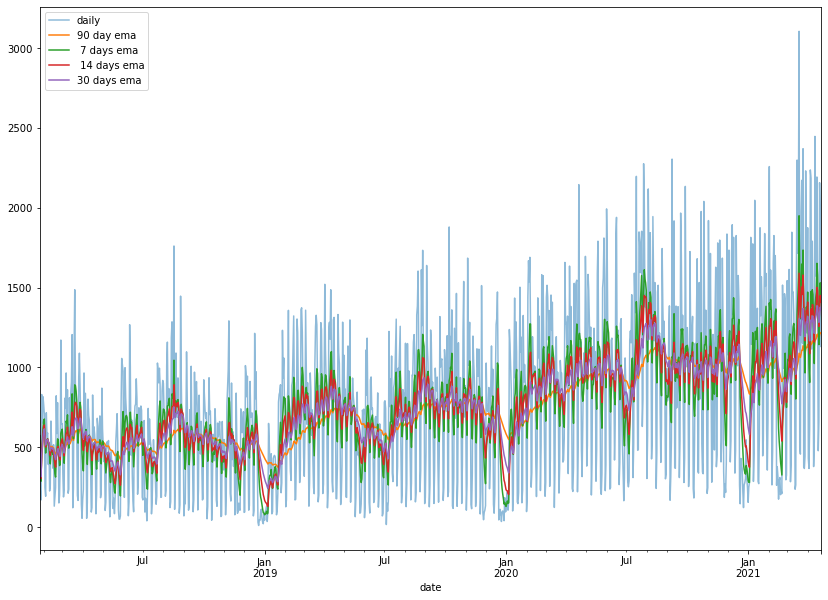

In [66]:
#lets plot those different ema
plt.figure(figsize = (14,10))
pages.plot(label = "daily", alpha = 0.5)
ema_90d.plot(label = "90 day ema")
ema_7d.plot(label = " 7 days ema")
ema_14d.plot(label =" 14 days ema")
ema_30d.plot(label = "30 days ema")
plt.legend()
plt.show()

Bollinger Bands 
a volatility indicator and commomnly used in stock marrket trading
made up of 3 lines, upper band,lower band, mid band

In [67]:
# compute mid band and standard deviation(span is 30 days), upper band anf lower band
midband = pages.ewm(30).mean()
stddev =  pages.ewm(30).std()
ub = midband + stddev * 3
lb = midband - stddev * 3

In [68]:
#check out midband
midband.head()

date
2018-01-26    572.000000
2018-01-27    398.196721
2018-01-28    319.623791
2018-01-29    453.560399
2018-01-30    495.892749
Freq: D, Name: endpoint, dtype: float64

In [69]:
#check out stddev
stddev.head()

date
2018-01-26           NaN
2018-01-27    241.830519
2018-01-28    215.412464
2018-01-29    312.539072
2018-01-30    283.392888
Freq: D, Name: endpoint, dtype: float64

In [70]:
#check out ub
ub.head()

date
2018-01-26            NaN
2018-01-27    1123.688279
2018-01-28     965.861182
2018-01-29    1391.177614
2018-01-30    1346.071414
Freq: D, Name: endpoint, dtype: float64

In [71]:
#check out lower band
lb.head()

date
2018-01-26           NaN
2018-01-27   -327.294836
2018-01-28   -326.613601
2018-01-29   -484.056817
2018-01-30   -354.285915
Freq: D, Name: endpoint, dtype: float64

In [72]:
#lets see what we get when we reset the index
pages.reset_index().head(1)
#we will use this to concat pages, midband, ub and lb

,date,endpoint
0,2018-01-26,572


In [73]:
#make a new dataframe by concat
my_df = pd.concat([pages.reset_index().endpoint,midband.reset_index().endpoint, ub.reset_index().endpoint, lb.reset_index().endpoint], axis = 1)
my_df.columns = ["pages","midband","ub","lb"]
my_df.index = pages.index
my_df.head()

,pages,midband,ub,lb
date,,,,
2018-01-26,572,572.000000,NaN,NaN
2018-01-27,230,398.196721,1123.688279,-327.294836
2018-01-28,170,319.623791,965.861182,-326.613601
2018-01-29,830,453.560399,1391.177614,-484.056817
2018-01-30,652,495.892749,1346.071414,-354.285915


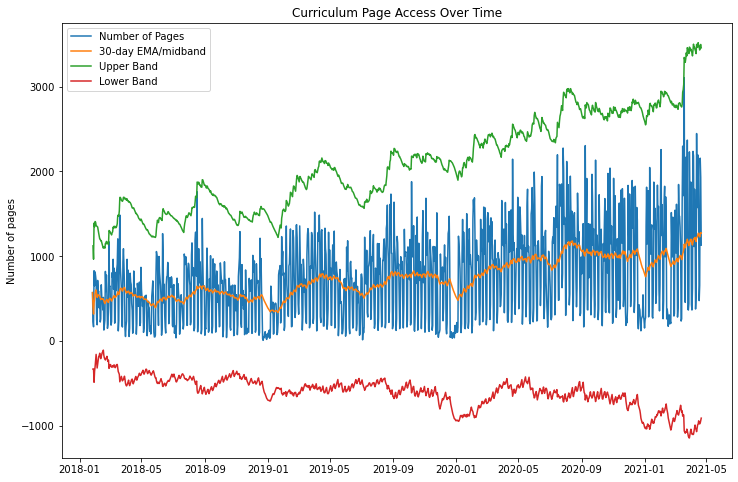

In [74]:
# let us plot the bands
fig, ax = plt.subplots(figsize=(12,8))

ax.plot(my_df.index, my_df.pages, label='Number of Pages')

ax.plot(my_df.index, my_df.midband, label = '30-day EMA/midband')
ax.plot(my_df.index, my_df.ub, label = 'Upper Band')
ax.plot(my_df.index, my_df.lb, label = 'Lower Band')

ax.legend(loc='best')
ax.set_ylabel('Number of pages')
plt.title('Curriculum Page Access Over Time')
plt.show()

    there does not seem to be any anomolies over upper and lower band
    we can verify that using percent bandwidth

Calculate %b (percent bandwidth)
 


In [75]:
my_df["pct_b"] = (my_df["pages"] - my_df["lb"])/(my_df["ub"]- my_df["lb"])

In [76]:
# if %b > 1, anomiles lies above upper bound
my_df[my_df["pct_b"] > 1]

,pages,midband,ub,lb,pct_b
date,,,,,


    there is no anomolies over upper bound

In [77]:
# if %b < 0 => anomilies lies below lower bound
my_df[my_df["pct_b"] < 0]

,pages,midband,ub,lb,pct_b
date,,,,,


    there is no anomolies below lower bound

Set up anomaly detection by individual user

In [78]:
def prep(df, user):
    """ Prepare a df with records only from specific user """
    # Make a df with records only from specific user
    user_df = df[df.user_id == user]
    # Resample user_df by day
    pages = user_df.endpoint.resample('d').count()
    return pages

In [79]:
def compute_pct_b(pages, span, weight, user):
    """ Compute the %b (Bollinger Band percentage) and output results as df """
    midband = pages.ewm(span=span).mean()
    stdev = pages.ewm(span=span).std()
    ub = midband + stdev*weight
    lb = midband - stdev*weight
    bb = pd.concat([ub, lb], axis=1)
    my_df = pd.concat([pages, midband, bb], axis=1)
    my_df.columns = ['pages', 'midband', 'ub', 'lb']
    my_df['pct_b'] = (my_df['pages'] - my_df['lb'])/(my_df['ub'] - my_df['lb'])
    my_df['user_id'] = user
    return my_df


In [80]:
def plt_bands(my_df, user):
    """ Plot pages with Bollinger Bands """
    fig, ax = plt.subplots(figsize=(12,8))
    ax.plot(my_df.index, my_df.pages, label='Number of Pages, User: '+str(user))
    ax.plot(my_df.index, my_df.midband, label = 'EMA/midband')
    ax.plot(my_df.index, my_df.ub, label = 'Upper Band')
    ax.plot(my_df.index, my_df.lb, label = 'Lower Band')
    ax.legend(loc='best')
    ax.set_ylabel('Number of Pages')
    plt.show()

def find_anomalies(df, user, span, weight):
    """ Identify anomalies, meaning %b is above 1. This equates to > weight*std above the EMA with length span"""
    pages = prep(df, user)
    my_df = compute_pct_b(pages, span, weight, user)
    # plt_bands(my_df, user)
    return my_df[my_df.pct_b>1]

Test functioms on single user

In [81]:
user = 1
span = 30
weight = 6

anomalies = pd.DataFrame()
# Find anomalies for specific user based on pages, span, and weight
user_df = find_anomalies(df,user,span,weight)
# Concatenate anomalies df to the user's page views
anomalies = pd.concat([anomalies,user_df],axis = 0)

In [82]:
anomalies.head()

,pages,midband,ub,lb,pct_b,user_id
date,,,,,,


    no daily anomaly for user 1

Use function in a loop examining all users:


In [83]:
#our df
df.head()

,endpoint,user_id,cohort_id,source_ip
date,,,,
2018-01-26,/,1,8.0,97.105.19.61
2018-01-26,java-ii,1,8.0,97.105.19.61
2018-01-26,java-ii/object-oriented-programming,1,8.0,97.105.19.61
2018-01-26,slides/object_oriented_programming,1,8.0,97.105.19.61
2018-01-26,javascript-i/conditionals,2,22.0,97.105.19.61


In [84]:
# loop for all unique user id
weight = 3.5

anomalies =pd.DataFrame()

for u in df.user_id.unique():
    one_user = find_anomalies(df,u,span,weight)
    anomalies = pd.concat([anomalies, one_user])


In [85]:
anomalies

,pages,midband,ub,lb,pct_b,user_id
date,,,,,,
2019-01-29,44,3.623334,42.081344,-34.834677,1.024945,1
2019-07-08,101,8.248768,96.507472,-80.009936,1.025451,1
2018-10-15,9,0.581421,8.457414,-7.294571,1.034446,3
2019-01-09,4,0.262470,3.802115,-3.277175,1.027953,3
2019-04-06,2,0.129825,1.889712,-1.630061,1.031334,3
...,...,...,...,...,...,...
2021-01-24,7,0.574393,6.857226,-5.708440,1.011362,817
2021-03-25,59,6.824556,58.415342,-44.766230,1.005666,843
2021-02-23,67,8.229409,66.322904,-49.864086,1.005828,851


In [86]:
#value count of user
anomalies.user_id.value_counts()
#user 88 visits the pages most

88     12
146    11
80     11
18     10
291     9
       ..
526     1
527     1
528     1
206     1
859     1
Name: user_id, Length: 413, dtype: int64

What if we sort by %b?

In [87]:
anomalies.sort_values("pct_b", ascending = False)

,pages,midband,ub,lb,pct_b,user_id
date,,,,,,
2020-12-24,1,0.064516,0.939061,-0.810028,1.034841,232
2020-12-16,12,0.774194,11.268729,-9.720342,1.034841,156
2020-09-13,4,0.258065,3.756243,-3.240114,1.034841,210
2020-05-12,16,1.032258,15.024972,-12.960456,1.034841,93
2019-09-12,16,1.032258,15.024972,-12.960456,1.034841,94
...,...,...,...,...,...,...
2021-03-23,146,26.440411,145.913292,-93.032470,1.000363,581
2020-09-17,24,2.103030,23.984360,-19.778300,1.000357,560
2020-10-27,17,1.232625,16.991469,-14.526220,1.000271,613


Not super useful. Looks like there could be a fair number of "false positives" here. Lets sort by the page counts:


In [88]:
anomalies.sort_values('pages', ascending=False)


,pages,midband,ub,lb,pct_b,user_id
date,,,,,,
2019-03-03,272,24.721632,266.780128,-217.336864,1.010782,341
2018-06-02,198,16.484863,188.766965,-155.797239,1.026796,138
2019-12-19,192,19.601776,187.231096,-148.027544,1.014225,526
2020-10-16,179,20.158062,173.720239,-133.404115,1.017191,658
2020-06-05,165,20.035882,163.037501,-122.965736,1.006862,521
...,...,...,...,...,...,...
2019-05-21,1,0.064519,0.939144,-0.810106,1.034790,19
2020-11-21,1,0.065202,0.959398,-0.828994,1.022703,410
2019-03-20,1,0.064516,0.939061,-0.810029,1.034841,126


user id 341 looked at 272 pages in one day, lets investigae his activity

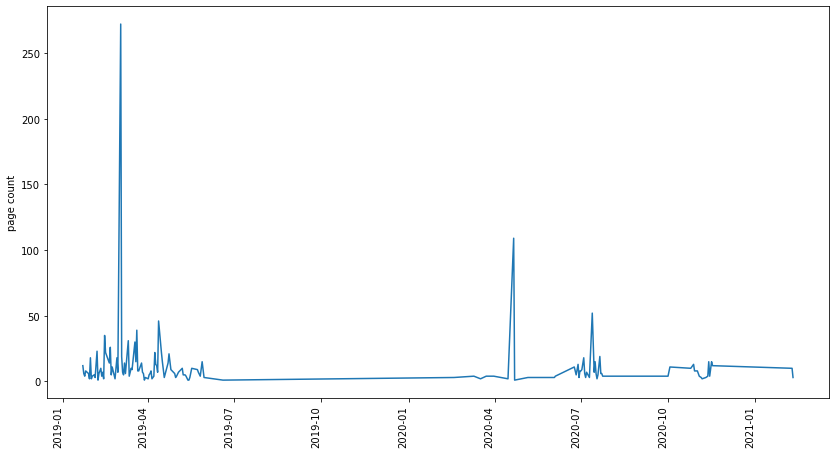

In [89]:
plt.figure(figsize = (14,8))
df[df.user_id == 341].index.value_counts().plot()
plt.xticks(rotation = 90)
plt.ylabel("page count")
plt.show()

    the highest peak, the page count, must be 272. looks like he does not ping the pages on frequest basis

lets also find out about user 88 as he has the highest value count

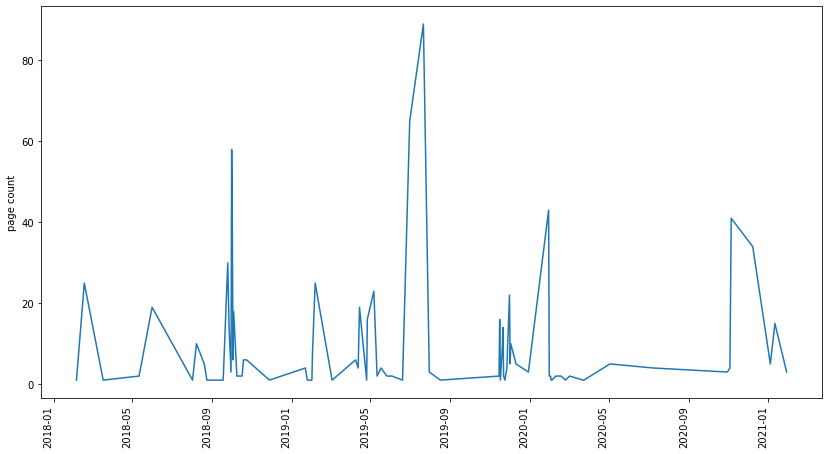

In [90]:
plt.figure(figsize = (14,8))
df[df.user_id == 88].index.value_counts().plot()
plt.xticks(rotation = 90)
plt.ylabel("page count")
plt.show()

    he is on the pages throught out the years, some months very much